# Model Evaluation and Selection

In this notebook, we will learn how to evaluate and select regression models using the supermarket sales dataset.

**Objectives:**
- Understand key evaluation metrics
- Compare different regression models
- Use interactive tools to select the best model

In [1]:
# Import libraries and load data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import ipywidgets as widgets

# Load dataset
file_path = '../../data/SuperMarketAnalysis.csv'
df = pd.read_csv(file_path)

## Understanding Model Evaluation

### What is Model Evaluation?

Model evaluation is the process of assessing how well a machine learning model performs on unseen data. It helps us:

1. **Compare different models** to select the best one for our problem
2. **Understand model performance** and identify potential issues
3. **Make informed decisions** about model deployment
4. **Detect overfitting or underfitting** in our models

### Evaluation Metrics for Regression

- **Mean Squared Error (MSE):** Measures average squared difference between actual and predicted values.
- **Mean Absolute Error (MAE):** Measures average absolute difference.
- **R² Score:** Proportion of variance explained by the model.

### Why Multiple Metrics for Regression?

Unlike classification where accuracy might suffice, regression requires multiple metrics because:

**1. Different Perspectives on Error:**
- Some metrics focus on **large errors** (MSE) while others treat all errors equally (MAE)
- Different business contexts may prioritize different types of errors

**2. Scale Sensitivity:**
- MSE is in squared units, making it harder to interpret
- MAE is in original units, more intuitive
- R² is unitless, good for comparing across different datasets

**3. Outlier Sensitivity:**
- **MSE** heavily penalizes large errors (outliers have huge impact)
- **MAE** is more robust to outliers
- **R²** can be misleading with outliers

### How to Choose the Right Metric:

| Metric | Use When | Advantages | Disadvantages |
|--------|----------|------------|---------------|
| **MSE** | Large errors are very costly | Penalizes big mistakes heavily | Sensitive to outliers, hard to interpret |
| **MAE** | All errors are equally important | Easy to interpret, robust to outliers | Doesn't distinguish between small and large errors |
| **R²** | Want to understand explained variance | Scale-independent, easy to understand (0-1) | Can be misleading, doesn't show error magnitude |

### Best Practice:
**Always use multiple metrics together** to get a complete picture of model performance. A model that looks good on one metric might perform poorly on another!

Let's compute these metrics for different models.

In [2]:
# Prepare data
features = ['Unit price', 'Branch', 'Product line', 'Gender', 'Customer type']
df_encoded = pd.get_dummies(df[features], drop_first=True)
X = df_encoded
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit models
def fit_and_evaluate(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1, max_iter=10000)
}

results = {name: fit_and_evaluate(model) for name, model in models.items()}

# Display results
results_df = pd.DataFrame(results, index=['MSE', 'MAE', 'R2']).T
results_df

,MSE,MAE,R2
Linear Regression,35813.862404,147.071757,0.449517
Ridge Regression,35808.438888,147.052587,0.449601
Lasso Regression,35802.034491,147.016845,0.449699


In [3]:
# Interactive model selection
@widgets.interact(model=list(models.keys()))
def show_metrics(model):
    mse, mae, r2 = results[model]
    print(f"{model} Results:")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.2f}")

interactive(children=(Dropdown(description='model', options=('Linear Regression', 'Ridge Regression', 'Lasso R…

## Visual Comparison

Let's visualize the predictions of each model against the actual values.

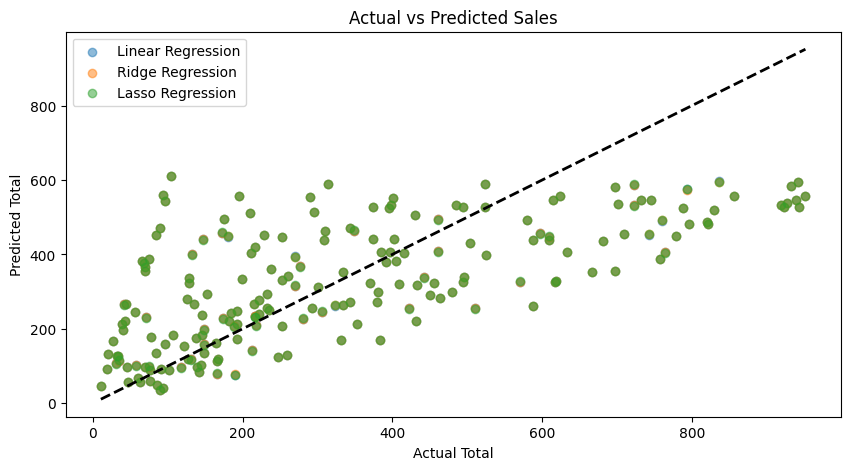

In [4]:
plt.figure(figsize=(10,5))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, label=name, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Total')
plt.ylabel('Predicted Total')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

In [5]:
models.items()

dict_items([('Linear Regression', LinearRegression()), ('Ridge Regression', Ridge()), ('Lasso Regression', Lasso(alpha=0.1, max_iter=10000))])

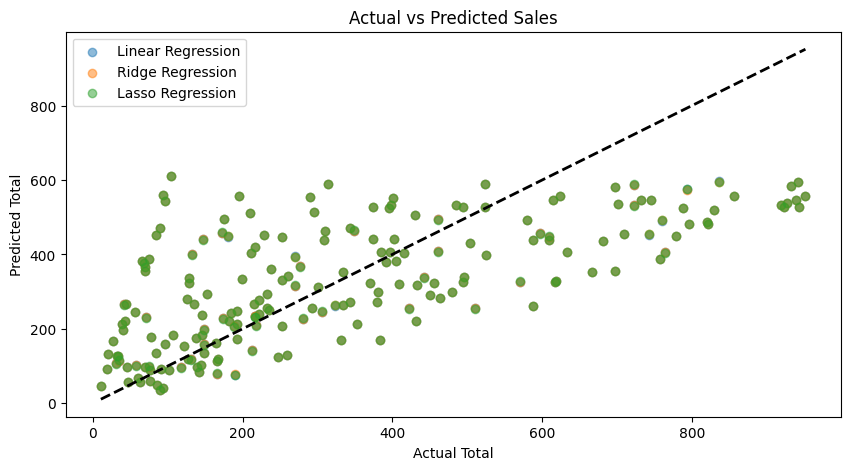

In [6]:
plt.figure(figsize=(10,5))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, label=name, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Total')
plt.ylabel('Predicted Total')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

As shown in the graph above, the three regression models perform similarly. It may be worthwhile to explore more advanced models that can capture more complex patterns and potentially improve our evaluation metrics.

## Conclusion

In this notebook, we explored the fundamental concepts of model evaluation for regression problems:

### Key Takeaways:

**1. Model Evaluation Purpose:**
- Helps compare different models objectively
- Identifies potential overfitting or underfitting issues
- Guides informed decisions about model deployment

**2. Multiple Metrics Are Essential:**
- **MSE**: Best when large errors are costly (penalizes outliers heavily)
- **MAE**: Ideal when all errors are equally important (robust to outliers)
- **R²**: Useful for understanding explained variance (scale-independent)

**3. Practical Implementation:**
- We compared Linear, Ridge, and Lasso regression on supermarket sales data
- All three models performed similarly, showing the dataset's linear nature
- Interactive widgets enable dynamic model comparison

**4. Visual Analysis:**
- Scatter plots of actual vs predicted values reveal model performance patterns
- The diagonal line represents perfect predictions
- Similar clustering of all models indicates comparable performance

### Best Practices:
- Always use multiple evaluation metrics together
- Consider your business context when choosing which metrics to prioritize
- Visualize predictions to gain intuitive understanding of model behavior
- Use interactive tools to explore different model characteristics

### Next Steps:
Learn about cross-validation techniques for more robust and reliable model evaluation.